In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Выберем датасет по инсультам с Kaggle

In [34]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Проведем обнаружение и удаление выбросов на основе 5% и 95% квантилей для признака avg_glucose_level

In [36]:
min = np.percentile(df.avg_glucose_level, 5)
max = np.percentile(df.avg_glucose_level, 95)

In [37]:
df = df[(df.avg_glucose_level > min) & (df.avg_glucose_level < max)]

## Сделаем LabelEncoding для признака gender

In [38]:
df = df[ df.gender != 'Other']  # сбросим одно значение с неизвестным полом
print(df.gender.unique())

['Female' 'Male']


In [39]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df.gender)
df.gender

1       0
2       1
3       0
4       0
5       1
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 4597, dtype: int64

## Построим ViolinPlot ависимости целевого признака от среднего уровня глюкоза

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

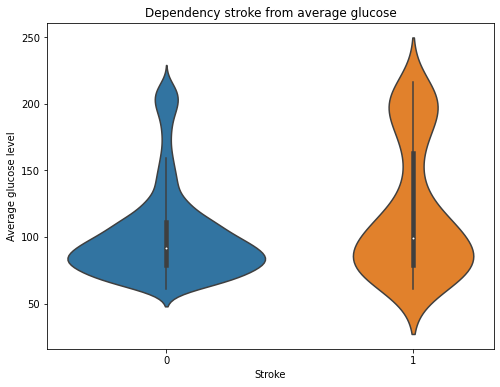

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.violinplot(df.stroke, df.avg_glucose_level)
ax.set(xlabel='Stroke', ylabel='Average glucose level', title='Dependency stroke from average glucose')
plt.plot()